In [84]:
import json
import networkx as nx

# 数据解析
with open('hw4_data.json', 'r') as file:
    data = json.load(file) 

G = nx.Graph()

# 添加节点
for node, score in data['nodes']:
    G.add_node(node, influence_score=score)

# 添加边
for u, v, weight in data['edges']:
    G.add_edge(u, v, weight=weight)

In [85]:
friends_dict = {node: list(G.neighbors(node)) for node in G.nodes()}
print(friends_dict)

{'Yanyan-Wang': ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin'], 'Aarebecca': ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy'], 'pomelo-nwu': ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975'], 'tyn1998': ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-yaya', 'pranavshuklaa', 'lidongze0629', 'yvonneyx', 'ste

In [86]:
# 用户度数
degrees = dict(G.degree())

# 根据度数排序
top_degree_users = sorted(degrees.items(), key=lambda item: item[1], reverse=True)[:5]
for i in range(len(top_degree_users)):
    print(f"第{i+1}名为 {top_degree_users[i][0]}，他的好友数为{top_degree_users[i][1]}")
print()
# 影响力最高的前5个用户
influence_scores = {node: G.nodes[node]['influence_score'] for node in G.nodes()}
top_influential_users = sorted(influence_scores.items(), key=lambda item: item[1], reverse=True)[:5]
for i in range(len(top_influential_users)):
    print(f'第{i+1}名为{top_influential_users[i][0]}，他的影响力分数为{top_influential_users[i][1]}')
print()
# 结合度数与影响力评分计算综合影响力
combined_scores = {node: (0.5 * degrees[node] + 0.5 * influence_scores[node]) for node in G.nodes()}
most_five_influential_overall = sorted(combined_scores.items(), key=lambda item: item[1], reverse=True)[:5]
print('综合好友数和影响力分数得到总排行榜为：')
print()
for i in range(len(most_five_influential_overall)):
    print(f'第{i +1}名为{most_five_influential_overall[i][0]}，他的综合分数为{most_five_influential_overall[i][1]}')
print()

第1名为 tyn1998，他的好友数为30
第2名为 frank-zsy，他的好友数为30
第3名为 pomelo-nwu，他的好友数为24
第4名为 andyhuang18，他的好友数为23
第5名为 wj23027，他的好友数为23

第1名为Yanyan-Wang，他的影响力分数为50.95
第2名为Aarebecca，他的影响力分数为23.82
第3名为pomelo-nwu，他的影响力分数为22.36
第4名为tyn1998，他的影响力分数为16.64
第5名为frank-zsy，他的影响力分数为15.8

综合好友数和影响力分数得到总排行榜为：

第1名为Yanyan-Wang，他的综合分数为32.475
第2名为tyn1998，他的综合分数为23.32
第3名为pomelo-nwu，他的综合分数为23.18
第4名为frank-zsy，他的综合分数为22.9
第5名为Aarebecca，他的综合分数为17.41



In [87]:
def recommend_new_friends(user):
    friend_of_friends = set()
    for friend in friends_dict[user]:
        for foaf in friends_dict[friend]:
            if foaf not in friends_dict[user] and foaf != user:
                friend_of_friends.add(foaf)

    # 排序依据可以是共同朋友的数量
    common_friends_count = [(foaf, len(set(friends_dict[foaf]).intersection(friends_dict[user]))) for foaf in
                            friend_of_friends]
    return sorted(common_friends_count, key=lambda x: x[1], reverse=True)
for i in range(len(recommend_new_friends('Yanyan-Wang')[:5])):
    print(f'推荐第{i+1}名为{recommend_new_friends('Yanyan-Wang')[i][0]}，他和该用户有{recommend_new_friends('Yanyan-Wang')[i][1]}个共同好友')
print()
# 强度最高连接的用户
def get_strongest_connections(user):
    strongest_connections = sorted(
        [(u, v, d['weight']) for u, v, d in G.edges(data=True) if u == user or v == user],
        key=lambda x: x[2], reverse=True)[:5]
    return strongest_connections
for i in range(len(get_strongest_connections('Yanyan-Wang'))):
    print(f'连接强度第{i+1}名为{get_strongest_connections('Yanyan-Wang')[i]}')

推荐第1名为longyanz，他和该用户有6个共同好友
推荐第2名为birdflyi，他和该用户有6个共同好友
推荐第3名为PureNatural，他和该用户有6个共同好友
推荐第4名为zhaosj975，他和该用户有6个共同好友
推荐第5名为xiaoya-yaya，他和该用户有6个共同好友

连接强度第1名为('Yanyan-Wang', 'Aarebecca', 25.3)
连接强度第2名为('Yanyan-Wang', 'pomelo-nwu', 25.09)
连接强度第3名为('Yanyan-Wang', 'yangzy0603', 11.85)
连接强度第4名为('Yanyan-Wang', 'tyn1998', 9.62)
连接强度第5名为('Yanyan-Wang', 'yvonneyx', 7.39)


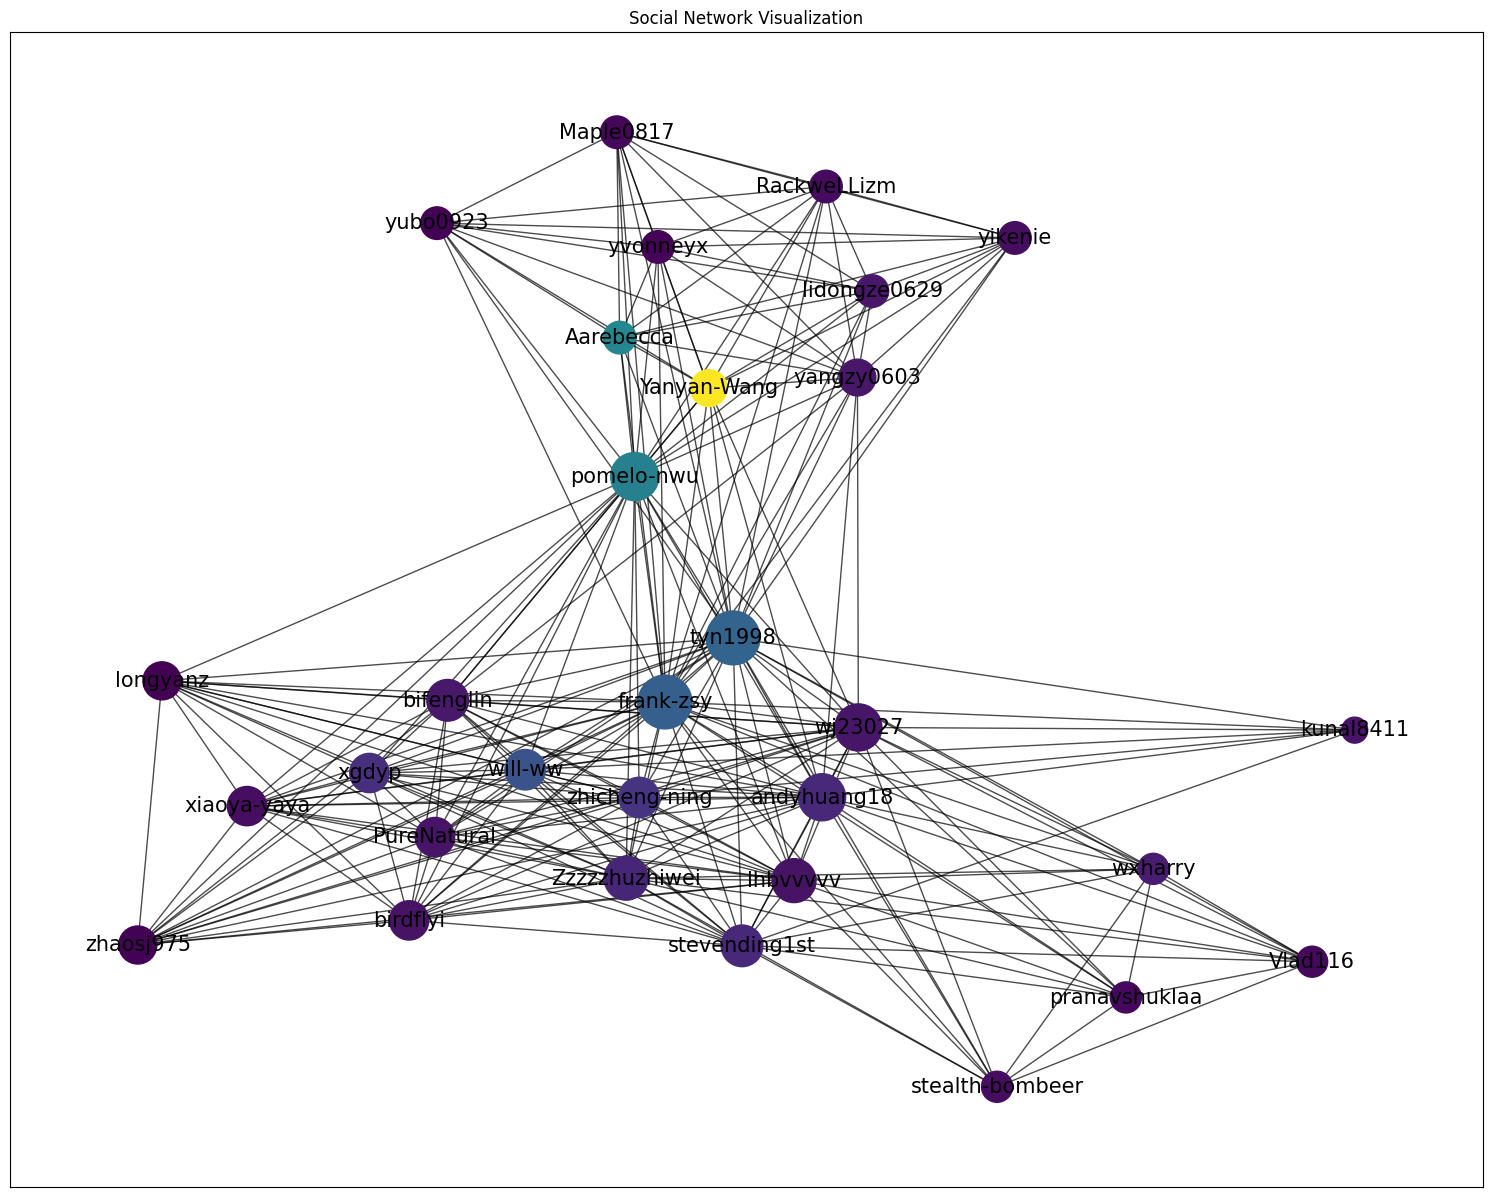

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(19, 15))
pos = nx.spring_layout(G)  # 节点布局算法
nx.draw_networkx_nodes(G, pos, node_size=[v * 50 for v in degrees.values()],node_color=[s for s in influence_scores.values()])
nx.draw_networkx_edges(G, pos, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=15)
plt.title('Social Network Visualization')
plt.show()